In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse

In [2]:
path = 'crime_data_raw/2016_raw.csv'

In [3]:
df = pd.read_csv(path,parse_dates=[['Date', 'Hour']])

In [4]:
df.head()

,Date_Hour,Unnamed: 0,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2016-04-10 20:00:00,0,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11 19:00:00,1,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2
2,2016-04-12 20:00:00,2,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1
3,2016-04-13 02:00:00,3,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1
4,2016-04-14 03:00:00,4,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1


## Inspect Premise col

In [5]:
len(df.Premise.value_counts(dropna=False))

126

In [6]:
df.Premise.value_counts(dropna=False).head()

Residence or House                     17013
Apartment Parking Lot                  13931
Road, Street, or Sidewalk              12857
Apartment                              11923
Restaurant or Cafeteria Parking Lot     5034
Name: Premise, dtype: int64

In [7]:
len(df.Premise.unique())

126

In [8]:
df.Premise = df.Premise.str.strip()

In [9]:
len(df.Premise.value_counts(dropna=False))

126

In [10]:
df.Premise.value_counts(dropna=False).head()

Residence or House                     17013
Apartment Parking Lot                  13931
Road, Street, or Sidewalk              12857
Apartment                              11923
Restaurant or Cafeteria Parking Lot     5034
Name: Premise, dtype: int64

In [11]:
# check if  null values
df.isnull().values.any().any()

True

In [12]:
# check su, of null values
df.isnull().values.sum()

1400

In [13]:
len(df[df.isnull().any(axis=1)])

1400

## Visualize our data

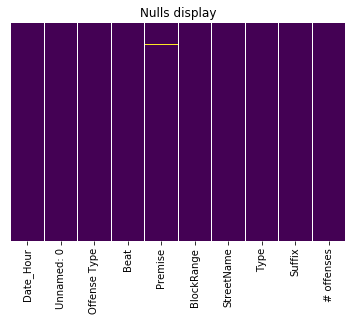

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## col cleaning

- joining similar columns
- renaming

In [15]:
df.head()

,Date_Hour,Unnamed: 0,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2016-04-10 20:00:00,0,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11 19:00:00,1,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2
2,2016-04-12 20:00:00,2,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1
3,2016-04-13 02:00:00,3,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1
4,2016-04-14 03:00:00,4,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1


In [16]:
df.head()

,Date_Hour,Unnamed: 0,Offense Type,Beat,Premise,BlockRange,StreetName,Type,Suffix,# offenses
0,2016-04-10 20:00:00,0,Robbery,10H10,"Road, Street, or Sidewalk",4000-4099,MILBY,-,-,1
1,2016-04-11 19:00:00,1,Aggravated Assault,10H10,"Road, Street, or Sidewalk",400-499,YORK,-,-,2
2,2016-04-12 20:00:00,2,Robbery,10H10,Apartment,1900-1999,RUNNELS,-,-,1
3,2016-04-13 02:00:00,3,Auto Theft,10H10,Driveway,100-199,SIDNEY,-,-,1
4,2016-04-14 03:00:00,4,Burglary,10H10,Service or Gas Station,3300-3399,CANAL,ST,-,1


In [17]:
df.rename(columns={
    '# offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 10 columns):
Date_Hour      122693 non-null datetime64[ns]
Unnamed: 0     122693 non-null int64
OffenseType    122693 non-null object
Beat           122693 non-null object
Premise        121293 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
Type           122693 non-null object
Suffix         122693 non-null object
NumOffenses    122693 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.4+ MB


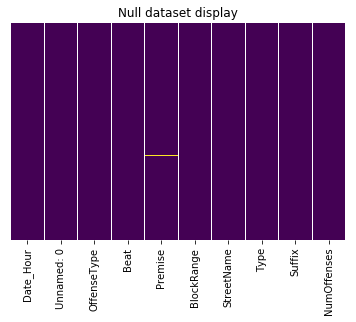

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Subset dataframe to work on 

In [19]:
crimes = df[['Date_Hour','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 7 columns):
Date_Hour      122693 non-null datetime64[ns]
Beat           122693 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
OffenseType    122693 non-null object
Premise        121293 non-null object
NumOffenses    122693 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.6+ MB


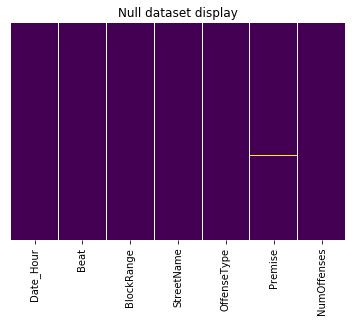

In [20]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

# FIND NAN onevery col

In [21]:
len(crimes[crimes.isnull().any(axis=1)])

1400

In [22]:
crimes[crimes.isnull().any(axis=1)].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
176,2016-04-23 19:00:00,10H40,1000-1099,ELGIN,Theft,NaN,1
309,2016-04-02 09:00:00,10H60,5900-5999,SCOTT,Theft,NaN,1
326,2016-04-27 05:00:00,10H60,2300-2399,WICHITA,Burglary,NaN,1
485,2016-04-10 10:00:00,10H80,1100-1199,AUTREY,Theft,NaN,1
670,2016-04-26 15:00:00,11H10,7400-7499,SATSUMA,Aggravated Assault,NaN,1


## Find NaN
- drop if > 2 nan

In [23]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 7 columns):
Date_Hour      122693 non-null datetime64[ns]
Beat           122693 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
OffenseType    122693 non-null object
Premise        121293 non-null object
NumOffenses    122693 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.6+ MB


In [24]:
len(crimes[crimes.isnull().any(axis=1)])

1400

In [25]:
crimes[crimes.isnull().any(axis=1)].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
176,2016-04-23 19:00:00,10H40,1000-1099,ELGIN,Theft,NaN,1
309,2016-04-02 09:00:00,10H60,5900-5999,SCOTT,Theft,NaN,1
326,2016-04-27 05:00:00,10H60,2300-2399,WICHITA,Burglary,NaN,1
485,2016-04-10 10:00:00,10H80,1100-1199,AUTREY,Theft,NaN,1
670,2016-04-26 15:00:00,11H10,7400-7499,SATSUMA,Aggravated Assault,NaN,1


## Inspect each column

In [26]:
crimes.dtypes

Date_Hour      datetime64[ns]
Beat                   object
BlockRange             object
StreetName             object
OffenseType            object
Premise                object
NumOffenses             int64
dtype: object

## Beat
- 120 beats

In [27]:
len(crimes.Beat.value_counts())

120

In [28]:
len(crimes.Beat.value_counts(dropna=False))

120

In [29]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I40', '21I50', '21I60', '23J50',
       '24C10', '24C20', '24C30', '24C40', '24C50', '24C60', '2A10',
       '2A20', '2A30', '2A40', '2A50', '2A60', '3B10', '3B30', '3B40',
       '3B50', '4F10', '4F20', '4F30', '5F10', '5F20', '5F30', '5F40',
       '6B10', '6B20', '6B30', '6B40', '6B50', '6B60', '7C10', '7C20',
       '7C30',

In [30]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
len(crimes.Beat.value_counts(dropna=False))

120

In [32]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [33]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

120

In [34]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I30', '21I40', '21I50', '21I60', '23J50',
       '24C10', '24C20', '24C30', '24C40', '24C50', '24C60', '2A10',
       '2A20', '2A30', '2A40', '2A50', '2A60', '3B10', '3B30', '3B40',
       '3B50', '4F10', '4F20', '4F30', '5F10', '5F20', '5F30', '5F40',
       '6B10', '6B20', '6B30', '6B40', '6B50', '6B60', '7C10', '7C20',
       '7C30',

In [35]:
crimes.Beat.value_counts(dropna=False).head()

1A20     3049
12D10    2576
19G10    2386
1A30     2273
2A50     2259
Name: Beat, dtype: int64

## BlockRange

In [36]:
len(crimes.BlockRange.value_counts(dropna=False))

242

In [37]:
crimes.BlockRange.value_counts(dropna=False).head()

2300-2399    1752
100-199      1707
900-999      1582
2400-2499    1529
1000-1099    1484
Name: BlockRange, dtype: int64

In [38]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [39]:
len(crimes.BlockRange.value_counts(dropna=False))

242

## StreetName

In [40]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7844


In [41]:
crimes.StreetName = crimes.StreetName.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [42]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7844


In [43]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER     3768
SAM HOUSTON    1792
GULF           1785
KATY           1696
GESSNER        1680
Name: StreetName, dtype: int64


## OffenseType

In [44]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:8


In [45]:
crimes.OffenseType = crimes.OffenseType.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [46]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:8


In [47]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 69219
Burglary              18442
Auto Theft            12690
Aggravated Assault    10866
Robbery                9955
Rape                   1232
Murder                  285
1                         4
Name: OffenseType, dtype: int64


In [48]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [49]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 69219
Burglary              18442
Auto Theft            12690
Aggravated Assault    10866
Robbery                9955
Rape                   1232
Murder                  285
1                         4
Name: OffenseType, dtype: int64


## Premise

In [50]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:126


In [51]:
crimes.Premise = crimes.Premise.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [52]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:126


In [53]:
crimes.Premise.value_counts(dropna=False).head()

Residence or House                     17013
Apartment Parking Lot                  13931
Road, Street, or Sidewalk              12857
Apartment                              11923
Restaurant or Cafeteria Parking Lot     5034
Name: Premise, dtype: int64

# Date as index

In [54]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122693 entries, 0 to 122692
Data columns (total 7 columns):
Date_Hour      122693 non-null datetime64[ns]
Beat           122693 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
OffenseType    122693 non-null object
Premise        121293 non-null object
NumOffenses    122693 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.6+ MB


In [55]:
# date
crimes.Date_Hour = pd.to_datetime(crimes.Date_Hour)
crimes = crimes.set_index('Date_Hour').sort_index(ascending=True)

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [56]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
Date_Hour,,,,,,
1916-05-23 19:00:00,10H70,UNK,LIBERTY ROAD,Aggravated Assault,Residence or House,1
1916-08-06 09:00:00,6B30,5800-5899,HOUSTON ROSSLYN,Burglary,Rental Storage Facility,1
1916-10-22 09:00:00,18F20,5300-5399,ALABAMA,Theft,Commercial Parking Lot or Garage,1
1916-10-22 13:00:00,20G30,2900-2999,HAYES,Theft,Apartment,1
1916-10-22 15:00:00,19G40,8400-8499,COOK,Burglary,"Vacant Storage Fac (Barn,Garage,Warehouse)",1


## Create Columns with day,weekday,month,year from date index

In [57]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')
crimes['Hour'] = crimes.index.strftime('%H')

In [58]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,day,weekday,month,year,Hour
Date_Hour,,,,,,,,,,,
1916-05-23 19:00:00,10H70,UNK,LIBERTY ROAD,Aggravated Assault,Residence or House,1,23,Tuesday,May,1916,19
1916-08-06 09:00:00,6B30,5800-5899,HOUSTON ROSSLYN,Burglary,Rental Storage Facility,1,06,Sunday,Aug,1916,09
1916-10-22 09:00:00,18F20,5300-5399,ALABAMA,Theft,Commercial Parking Lot or Garage,1,22,Sunday,Oct,1916,09
1916-10-22 13:00:00,20G30,2900-2999,HAYES,Theft,Apartment,1,22,Sunday,Oct,1916,13
1916-10-22 15:00:00,19G40,8400-8499,COOK,Burglary,"Vacant Storage Fac (Barn,Garage,Warehouse)",1,22,Sunday,Oct,1916,15


In [59]:
crimes.day.unique()

array(['23', '06', '22', '18', '28', '03', '16', '20', '01', '24', '29',
       '09', '21', '17', '27', '02', '05', '07', '13', '04', '25', '08',
       '19', '12', '26', '11', '10', '15', '14', '30', '31'], dtype=object)

In [60]:
len(crimes.day.unique())

31

In [61]:
crimes.day.value_counts(dropna=False)

01    4482
22    4211
15    4191
08    4180
16    4156
28    4149
09    4072
11    4065
10    4058
12    4055
02    4039
17    4037
04    4025
21    4022
18    4012
07    3985
29    3975
05    3974
03    3966
27    3962
23    3957
14    3955
06    3943
25    3937
20    3924
13    3915
26    3904
24    3850
19    3796
30    3677
31    2219
Name: day, dtype: int64

In [62]:
crimes.weekday.unique()

array(['Tuesday', 'Sunday', 'Monday', 'Friday', 'Wednesday', 'Saturday',
       'Thursday'], dtype=object)

In [63]:
crimes.weekday.value_counts(dropna=False)

Friday       18894
Monday       18045
Thursday     17984
Saturday     17524
Tuesday      17433
Wednesday    17198
Sunday       15615
Name: weekday, dtype: int64

In [64]:
crimes.month.value_counts(dropna=False)

Dec    10901
Aug    10659
May    10515
Jan    10513
Jul    10419
Oct    10366
Sep    10357
Jun    10307
Nov    10040
Apr     9938
Mar     9919
Feb     8759
Name: month, dtype: int64

In [65]:
crimes.year.value_counts(dropna=False)

2016    121421
2015       992
2014       115
2013        42
2012        21
2007        16
2010        15
2008         7
2006         7
2009         6
1916         5
2011         5
2001         5
2002         4
1977         3
1992         3
2003         2
1998         2
2005         2
2004         2
1926         1
1921         1
1920         1
1918         1
2000         1
1997         1
1999         1
1971         1
1919         1
1985         1
1991         1
1986         1
1990         1
1989         1
1982         1
1965         1
1983         1
1993         1
Name: year, dtype: int64

## null values

- check
- count
- display

In [66]:
crimes.isnull().values.any().any()

True

In [67]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

1400

In [68]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,day,weekday,month,year,Hour
Date_Hour,,,,,,,,,,,
1991-09-21 20:00:00,11H10,7000-7099,CAPITOL,Rape,NaN,1,21,Saturday,Sep,1991,20
2002-02-23 08:00:00,2A60,3000-3099,11TH,Rape,NaN,1,23,Saturday,Feb,2002,08
2002-11-04 13:00:00,19G50,11700-11799,SOUTHWEST,Theft,NaN,1,04,Monday,Nov,2002,13
2005-09-20 22:00:00,14D20,5000-5099,SUNFLOWER,Rape,NaN,1,20,Tuesday,Sep,2005,22
2006-04-08 19:00:00,17E20,9100-9199,FONDREN,Rape,NaN,1,08,Saturday,Apr,2006,19


In [69]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122693 entries, 1916-05-23 19:00:00 to 2016-12-31 23:00:00
Data columns (total 11 columns):
Beat           122693 non-null object
BlockRange     122693 non-null object
StreetName     122693 non-null object
OffenseType    122693 non-null object
Premise        121293 non-null object
NumOffenses    122693 non-null int64
day            122693 non-null object
weekday        122693 non-null object
month          122693 non-null object
year           122693 non-null object
Hour           122693 non-null object
dtypes: int64(1), object(10)
memory usage: 13.7+ MB


## New Dataframe
- remove premise col
- keep premise description

In [70]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1916-05-23 19:00:00,10H70,UNK,LIBERTY ROAD,Aggravated Assault,Residence or House,1,19,23,Tuesday,May,1916
1916-08-06 09:00:00,6B30,5800-5899,HOUSTON ROSSLYN,Burglary,Rental Storage Facility,1,09,06,Sunday,Aug,1916
1916-10-22 09:00:00,18F20,5300-5399,ALABAMA,Theft,Commercial Parking Lot or Garage,1,09,22,Sunday,Oct,1916
1916-10-22 13:00:00,20G30,2900-2999,HAYES,Theft,Apartment,1,13,22,Sunday,Oct,1916
1916-10-22 15:00:00,19G40,8400-8499,COOK,Burglary,"Vacant Storage Fac (Barn,Garage,Warehouse)",1,15,22,Sunday,Oct,1916


In [71]:
crime_yr.isnull().values.any().any()

True

In [72]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

1400

In [73]:
crime_yr[crime_yr.isnull().any(axis=1)].tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2016-12-31 11:00:00,3B40,800-899,CROSSTIMBERS,Robbery,NaN,1,11,31,Saturday,Dec,2016
2016-12-31 12:00:00,3B50,5200-5299,AIRLINE,Auto Theft,NaN,1,12,31,Saturday,Dec,2016
2016-12-31 18:00:00,12D10,8600-8699,AIRPORT,Theft,NaN,1,18,31,Saturday,Dec,2016
2016-12-31 23:00:00,20G30,3100-3199,HAYES,Aggravated Assault,NaN,1,23,31,Saturday,Dec,2016
2016-12-31 23:00:00,9C40,13300-13399,MARKET,Aggravated Assault,NaN,1,23,31,Saturday,Dec,2016


# FIND NANS

## INDEX

In [74]:
len(crime_yr[crime_yr.index.isnull()])

0

In [75]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [76]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1916-05-23 19:00:00', '1916-08-06 09:00:00',
               '1916-10-22 09:00:00', '1916-10-22 13:00:00',
               '1916-10-22 15:00:00', '1918-11-18 11:00:00',
               '1919-09-28 22:00:00', '1920-09-03 09:00:00',
               '1921-09-06 10:00:00', '1926-06-16 18:00:00',
               ...
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date_Hour', length=122693, freq=None)

In [77]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [78]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [79]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [80]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

In [81]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [82]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## BlockRAnge

In [83]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [84]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## StreetName

In [85]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

In [86]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [87]:
crime_yr.StreetName = crime_yr.StreetName.replace(np.nan, 'UNK')

In [88]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

## OffenseType

In [89]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [90]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [91]:
crime_yr.OffenseType = crime_yr.OffenseType.replace(np.nan, 'UNK')

In [92]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

## Hour

In [93]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [94]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Premsie 

In [95]:
len(crime_yr[crime_yr['Premise'].isnull()])

1400

In [96]:
crime_yr[crime_yr['Premise'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1991-09-21 20:00:00,11H10,7000-7099,CAPITOL,Rape,NaN,1,20,21,Saturday,Sep,1991
2002-02-23 08:00:00,2A60,3000-3099,11TH,Rape,NaN,1,08,23,Saturday,Feb,2002
2002-11-04 13:00:00,19G50,11700-11799,SOUTHWEST,Theft,NaN,1,13,04,Monday,Nov,2002
2005-09-20 22:00:00,14D20,5000-5099,SUNFLOWER,Rape,NaN,1,22,20,Tuesday,Sep,2005
2006-04-08 19:00:00,17E20,9100-9199,FONDREN,Rape,NaN,1,19,08,Saturday,Apr,2006


In [97]:
crime_yr['Premise'] = crime_yr['Premise'].replace(np.nan, 'No label')

In [98]:
len(crime_yr[crime_yr['Premise'].isnull()])

0

In [99]:
crime_yr[crime_yr['Premise'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [100]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [101]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Save

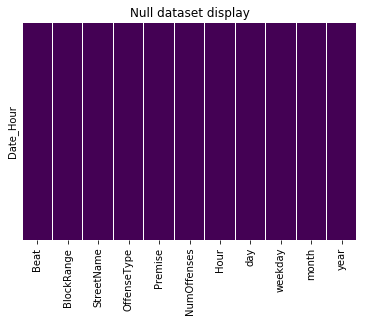

In [102]:
sns.heatmap(crime_yr.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [103]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1916-05-23 19:00:00,10H70,UNK,LIBERTY ROAD,Aggravated Assault,Residence or House,1,19,23,Tuesday,May,1916
1916-08-06 09:00:00,6B30,5800-5899,HOUSTON ROSSLYN,Burglary,Rental Storage Facility,1,09,06,Sunday,Aug,1916
1916-10-22 09:00:00,18F20,5300-5399,ALABAMA,Theft,Commercial Parking Lot or Garage,1,09,22,Sunday,Oct,1916
1916-10-22 13:00:00,20G30,2900-2999,HAYES,Theft,Apartment,1,13,22,Sunday,Oct,1916
1916-10-22 15:00:00,19G40,8400-8499,COOK,Burglary,"Vacant Storage Fac (Barn,Garage,Warehouse)",1,15,22,Sunday,Oct,1916


In [104]:
crime_yr.to_csv('crime_data_clean/years/Final_crime16_clean.csv')

In [105]:
ls crime_data_clean/years

Final_crime10_clean.csv*  Final_crime13_clean.csv*  Final_crime16_clean.csv*
Final_crime11_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*
